# Laboratorio 2

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm

#Lectura y transformación de datos
pd.set_option('display.float_format', '{:.2f}'.format)

c2024 = pd.read_excel("./Data/Consumos_2024.xlsx", skiprows = 6, nrows = 300) #Solo 300 registros
c2025 = pd.read_excel("./Data/Consumos_2025.xlsx", skiprows = 6, nrows = 5)
precios = pd.read_excel("./Data/Precios_combustibles.xlsx", skiprows = 7, nrows = 195)
precios = precios.drop(precios.index[0]).reset_index(drop=True)
consumos = pd.concat([c2024, c2025], ignore_index= True)
i2024 = pd.read_excel("./Data/Importaciones_combustibles_2024.xlsx", skiprows = 6, nrows = 288)
i2025 = pd.read_excel("./Data/Importaciones_combustibles_2025.xlsx", skiprows = 6, nrows = 5)
for df in (i2024, i2025):
    df.columns = (
        df.columns
          .str.strip()      
          .str.lower()      
)
importaciones = pd.concat([i2024, i2025], ignore_index = True)
importaciones.loc[:203, 'diesel bajo azufre'] = importaciones.loc[:203, 'diesel alto azufre']
importaciones['Diesel'] = importaciones['diesel bajo azufre']
consumos.loc[:203, 'Diesel bajo azufre'] = consumos.loc[:203, 'Diesel alto azufre']
consumos['Diesel'] = consumos['Diesel bajo azufre']
consumos['Fecha'] = pd.to_datetime(consumos['Fecha']).dt.strftime('%Y-%m')
importaciones['Fecha'] = pd.to_datetime(consumos['Fecha']).dt.strftime('%Y-%m')




def graficar_histogramas_boxplot(dataframe, tipo_gasolina, titulo_hist, titulo_box ):
    sns.histplot(
    data=dataframe,
    x=tipo_gasolina,
    stat="density",
    kde=True,
    bins=30
    )
    plt.title(titulo_hist)
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

    plt.figure()
    sns.boxplot(x=dataframe[tipo_gasolina])
    plt.title(titulo_box)
    plt.show()

def graficar_barras(dataset, xTitle, yTitle, generalTitle):
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(dataset.index, dataset.values, width=0.8)
    ax.set_xlabel(xTitle, fontsize=12)
    ax.set_ylabel(yTitle, fontsize=12)
    ax.set_title(generalTitle, fontsize=14, pad=15)
    ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.xticks(dataset.index, rotation=45)
    plt.tight_layout()
    plt.show()






In [37]:

consumos.head()

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gas natural,...,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total,Diesel
0,2000-01,0.00,48446.00,296766.99,0.00,0.00,634667.06,0.00,194410.48,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,634667.06,0.00,1750544.64,634667.06
1,2000-02,0.00,50597.00,328116.44,0.00,0.00,642380.66,0.00,174710.55,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,642380.66,0.00,1773220.22,642380.66
2,2000-03,0.00,27593.00,368589.63,0.00,0.00,699807.25,0.00,189234.07,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,699807.25,0.00,1909498.79,699807.25
3,2000-04,0.00,53794.00,396300.47,0.00,0.00,586803.98,0.00,174330.61,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,586803.98,0.00,1800932.86,586803.98
4,2000-05,0.00,60137.00,449368.92,0.00,0.00,656948.20,0.00,191745.15,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,656948.20,0.00,1941771.90,656948.20


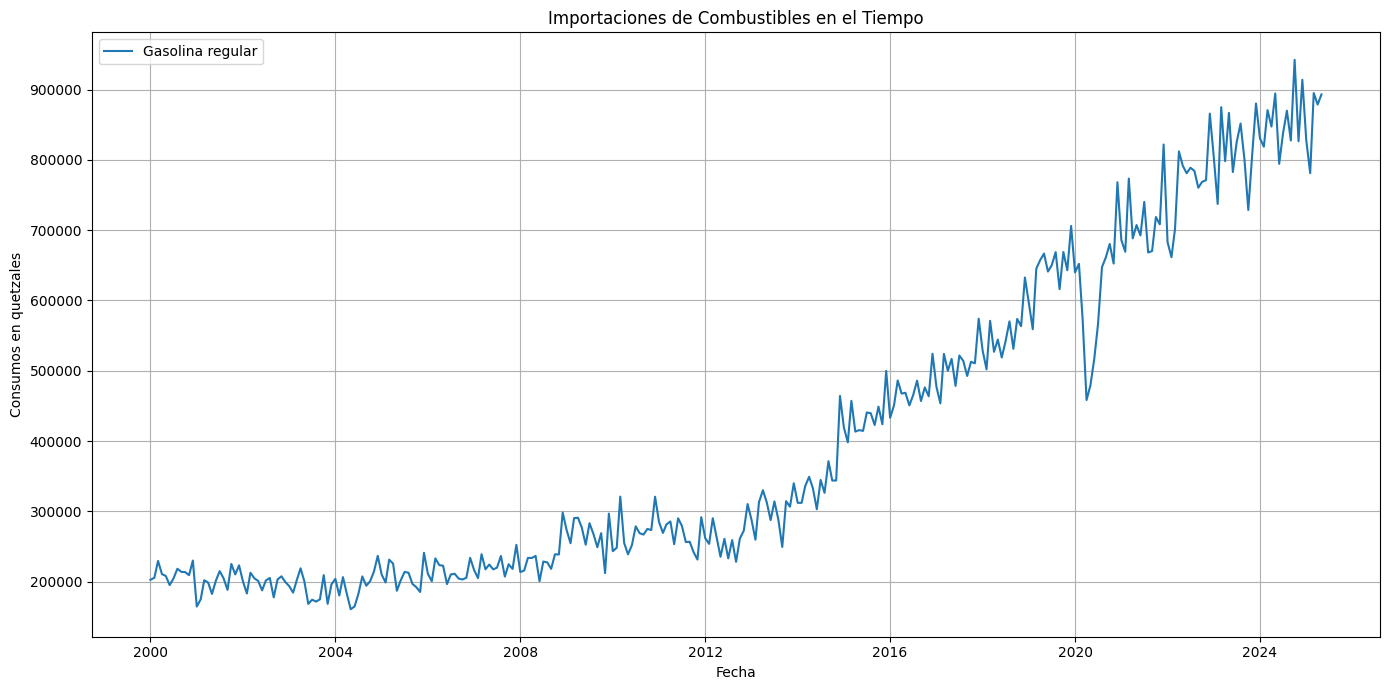

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

consumos['fecha'] = pd.to_datetime(consumos['Fecha'])

consumo_filtrado = consumos[['fecha', 'Gasolina regular']]

plt.figure(figsize=(14, 7))
plt.plot(consumo_filtrado['fecha'], consumo_filtrado['Gasolina regular'], label='Gasolina regular')

plt.title('Importaciones de Combustibles en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Consumos en quetzales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Descomponer la serie

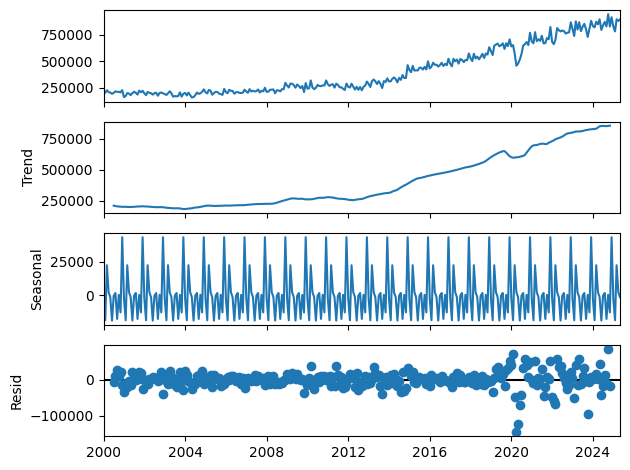

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
consumo_filtrado.set_index('fecha', inplace=True)

descomposicion = seasonal_decompose(consumo_filtrado)
descomposicion.plot();

Podemos ver que tiene tendencia lo que no la hace estacionaria en media y si es secuencial

## Test de Fuller


In [40]:
from statsmodels.tsa.stattools import adfuller

print('Resultados del Test de Dickey Fuller')
dfTest = adfuller(consumo_filtrado, autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller
Estadístico de prueba         2.29
p-value                       1.00
# de retardos usados         14.00
# de observaciones usadas   290.00
Critical Value (1%)          -3.45
Critical Value (5%)          -2.87
Critical Value (10%)         -2.57
dtype: float64


El p-value es 1.00, muy alto, lo que indica que no hay evidencia para rechazar la hipótesis nula. osea no es estacionaria

In [ ]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd

print('Resultados del Test de Dickey Fuller para log + diferenciación de la serie')


log_consumo = np.log(consumo_filtrado['Gasolina regular'])


ts_log_diff = log_consumo.diff().dropna()


dfTest = adfuller(ts_log_diff)


salidaDf = pd.Series(dfTest[0:4], index=[
    'Estadístico de prueba',
    'p-value',
    '# de retardos usados',
    '# de observaciones usadas'
])

for key, value in dfTest[4].items():
    salidaDf[f'Critical Value ({key})'] = value

print(salidaDf)


Resultados del Test de Dickey Fuller para log + diferenciación de la serie
Estadístico de prueba        -4.50
p-value                       0.00
# de retardos usados         16.00
# de observaciones usadas   287.00
Critical Value (1%)          -3.45
Critical Value (5%)          -2.87
Critical Value (10%)         -2.57
dtype: float64


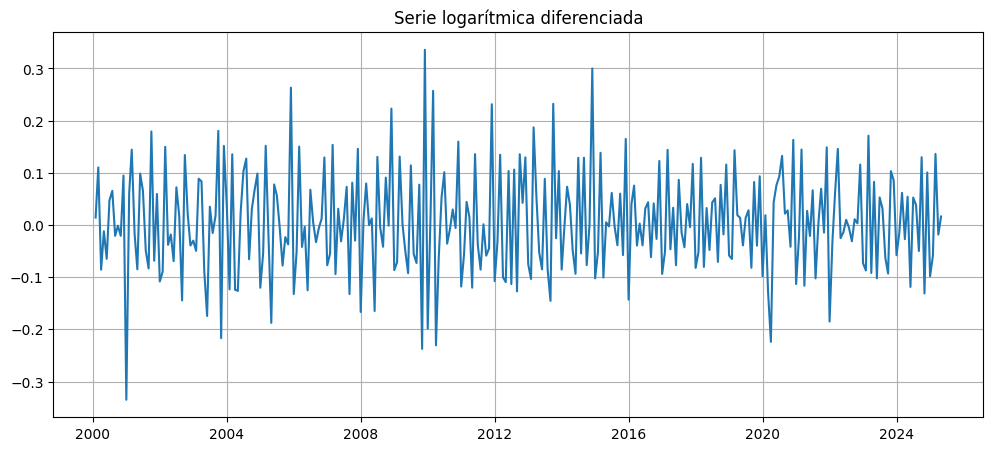

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(ts_log_diff)
plt.title("Serie logarítmica diferenciada")
plt.grid(True)
plt.show()


Ahora normalizamos

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ts_log_diff_scaled = scaler.fit_transform(ts_log_diff.values.reshape(-1, 1))  # reshape necesario
print(ts_log_diff_scaled[1:7])


[[ 1.06921195]
 [-0.91721505]
 [-0.17133464]
 [-0.70742475]
 [ 0.43114982]
 [ 0.61410053]]


Ahora dividimos la serie en entrenamiento y prueba

In [46]:

n = len(ts_log_diff_scaled)
entrenamiento = round(0.6 * n)
val_prueba = round(0.2 * n)


train = ts_log_diff_scaled[0:entrenamiento]
validation = ts_log_diff_scaled[entrenamiento:entrenamiento + val_prueba + 1]
test = ts_log_diff_scaled[(entrenamiento + val_prueba) - 1:]


train = np.insert(train, 0, 0)


train = train.reshape(-1, 1)
validation = validation.reshape(-1, 1)
test = test.reshape(-1, 1)

# Verificamos tamaños
print(f"Train: {len(train)}")
print(f"Validation: {len(validation)}")
print(f"Test: {len(test)}")


Train: 183
Validation: 62
Test: 62


Ahora la convertimos en entrenamiento y prueba

In [47]:
from operator import concat


def supervisada(serie,retrasos = 1):
    serie_x = []
    serie_y = []
    for i in range(len(serie)-retrasos):
        valor = serie[i:(i+retrasos),0]
        valor_sig = serie[i+retrasos,0]
        serie_x.append(valor)
        serie_y.append(valor_sig)
    return np.array(serie_x), np.array(serie_y)

x_train,y_train = supervisada(train)
x_val,y_val = supervisada(validation)
x_test,y_test = supervisada(test)

In [48]:
x_train = np.reshape(x_train,(x_train.shape[0],1,1))
x_val = np.reshape(x_val, (x_val.shape[0],1,1))
x_test = np.reshape(x_test, (x_test.shape[0],1,1))
len(x_val)

61

Hacemos el modelo

In [49]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

batch_size = 32 
timesteps = 12  
n_features = 1  
n_units = 50    

model = Sequential()


model.add(LSTM(units=n_units,
               stateful=False,
               input_shape=(timesteps, n_features),
               return_sequences=False)) 


model.add(Dropout(0.2))


model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


e:\Data_Science\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(loss='mean_squared_error',optimizer="rmsprop")

Ahora tuneamos

In [51]:
epocas = 50
history= model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_val,y_val),
    verbose=1
)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 1.1196 - val_loss: 0.5751
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0937 - val_loss: 0.5649
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.0838 - val_loss: 0.5567
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0668 - val_loss: 0.5494
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.0494 - val_loss: 0.5425
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.0412 - val_loss: 0.5364
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0280 - val_loss: 0.5308
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.0255 - val_loss: 0.5256
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0147 - val_loss: 0.5210
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0186 - val_loss: 0.5169
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9997 - val_loss: 0.5130
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9979 - val_loss: 0.5099
E

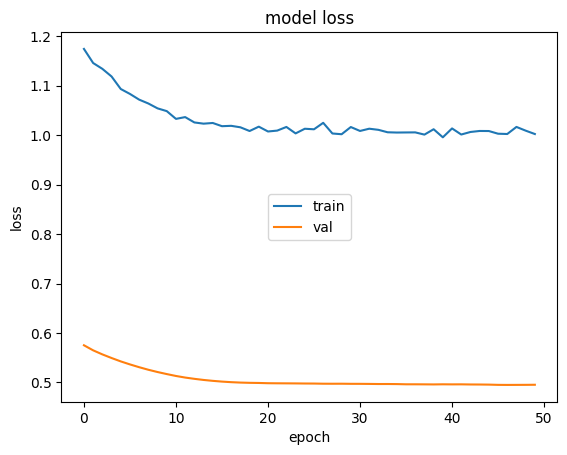

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')

Y ahora predecimos

In [54]:
prediccion_val = []

def prediccion_fun(data,modelo, batch_size,scaler,dif=False,dif_cant=1, Series = None , n=1):
    prediccion = [0]* (len(data))
    i=0
    for X in data:
        X = np.reshape(X,(1,1,1))
        yhat = modelo.predict(X, batch_size=batch_size,verbose=0)
        # invert scaling
        yhat = scaler.inverse_transform(yhat)
        if dif:
             # invert differencing
            yhat  = yhat + Series[(n+dif_cant*i)]
        # store
        prediccion[i]=yhat[0][0]
        i = i+1
    return prediccion
prediccion_val = prediccion_fun(x_val,model, 1,scaler,dif=True,dif_cant=1, Series = consumo_filtrado.values , n=entrenamiento)
prediccion_test = prediccion_fun(x_test,model, 1,scaler,dif=True,dif_cant=1, Series = consumo_filtrado.values , n=entrenamiento+val_prueba)


In [56]:
print(len(prediccion_test))


61


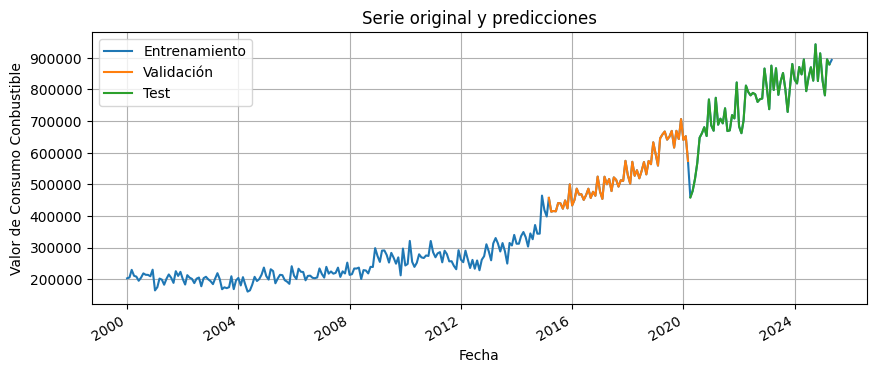

In [61]:
df_val = pd.DataFrame(prediccion_val,index=consumo_filtrado[(entrenamiento):entrenamiento+val_prueba].index)
start_test = entrenamiento + len(df_val)
end_test = start_test + len(prediccion_test)

df_test = pd.DataFrame(prediccion_test, index=consumo_filtrado[start_test:end_test].index)




plt.figure(figsize=(10,4))
plt.plot(consumo_filtrado,        label='Entrenamiento')
plt.plot(df_val,    label='Validación')

plt.plot(df_test,   label='Test')

plt.title('Serie original y predicciones')
plt.xlabel('Fecha')
plt.ylabel('Valor de Consumo Conbustible')
plt.grid(True)
plt.legend(loc='upper left')

plt.gcf().autofmt_xdate()
plt.show()

In [62]:
print("Pérdida en Entrenamiento")                              # opcional, para limpiar estados previos
train_loss = model.evaluate(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    verbose=1
)

print("\nPérdida en Validación")
val_loss = model.evaluate(
    x=x_val,
    y=y_val,
    batch_size=batch_size,
    verbose=1
)


print("Pérdida en prueba")
val_loss = model.evaluate(
    x=x_test,
    y=y_test,
    batch_size=batch_size,
    verbose=1
)


Pérdida en Entrenamiento
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9783 

Pérdida en Validación
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4443
Pérdida en prueba
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6162


Vemos que los valores son cercanos a 0, por lo que las predicciones para los 3 conjuntos de datos fueron bastante acertadas.